In [1]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.options.display.max_rows = 200

In [2]:
model_dir = '/oak/stanford/groups/akundaje/projects/neuro-variants/chrombpnet_models/domcke_2020/K562_bias'
outs_dir = '/oak/stanford/groups/akundaje/projects/neuro-variants/model_performance/domcke_2020'

In [3]:
cell_type_metrics_dict = {'celltype': [], 'fold': [],
                          'peaks_pearsonr': [], 'peaks_spearmanr': [], 'peaks_median_jsd': [],
                          'bias_correction_status': [], 'tn5_footprint_1': [], 'tn5_footprint_2': [], 'tn5_footprint_3': [],
                          'tn5_footprint_4': [], 'tn5_footprint_5': []
                          }

for cluster in os.listdir(model_dir):
    print(cluster)

    # for fold in [os.listdir(os.path.join(model_dir, cluster))]:
    for fold in ['fold_' + str(i) for i in range(5)]:
        metrics_json = os.path.join(model_dir, cluster, fold, 'evaluation', 'chrombpnet_metrics.json')
        footprints_txt = os.path.join(model_dir, cluster, fold, 'evaluation', 'chrombpnet_nobias_max_bias_response.txt')

        # if os.path.isfile(metrics_json) and os.path.isfile(footprints_txt):
        metrics = json.load(open(metrics_json))
        cell_type_metrics_dict['celltype'].append('.'.join(cluster.split('.')[1:3]))
        cell_type_metrics_dict['fold'].append(fold)
        cell_type_metrics_dict['peaks_pearsonr'].append(metrics['counts_metrics']['peaks']['pearsonr'])
        cell_type_metrics_dict['peaks_spearmanr'].append(metrics['counts_metrics']['peaks']['spearmanr'])
        cell_type_metrics_dict['peaks_median_jsd'].append(metrics['profile_metrics']['peaks']['median_jsd'])
        
        with open(footprints_txt, 'r') as footprints_file:
            lines = footprints_file.readlines()[0]
            status = lines.split('_')[0] # corrected or uncorrected
            val1 = [float(lines.split('_')[1])]
            val_rest = [float(i) for i in lines.split('_')[2].split('/')]

            cell_type_metrics_dict['bias_correction_status'].append(status)
            cell_type_metrics_dict['tn5_footprint_1'].append(val_rest[0])
            cell_type_metrics_dict['tn5_footprint_2'].append(val_rest[1])
            cell_type_metrics_dict['tn5_footprint_3'].append(val_rest[2])
            cell_type_metrics_dict['tn5_footprint_4'].append(val_rest[3])
            cell_type_metrics_dict['tn5_footprint_5'].append(val_rest[4])

        # else:
        #     print()
        #     print(metrics_json)
        #     print(footprints_txt)
        #     print()
                    
cell_type_metrics_df = pd.DataFrame(cell_type_metrics_dict)

domcke_2020.fetal_heart.Cardiomyocytes
domcke_2020.fetal_brain.Astrocytes
domcke_2020.fetal_heart.Vascular_endothelial_cells
domcke_2020.fetal_heart.Endocardial_cells
domcke_2020.fetal_brain.Inhibitory_neurons
domcke_2020.fetal_brain.Astrocytes_Oligodendrocytes
domcke_2020.fetal_brain.Limbic_system_neurons
domcke_2020.fetal_heart.ELF3_AGBL2_positive_cells
domcke_2020.fetal_heart.Heart_Unknown_10
domcke_2020.fetal_brain.Vascular_endothelial_cells
domcke_2020.fetal_heart.Stromal_cells
domcke_2020.fetal_brain.Excitatory_neurons
domcke_2020.fetal_heart.Schwann_cells
domcke_2020.fetal_heart.Myeloid_cells
domcke_2020.fetal_heart.Lymphoid_cells
domcke_2020.fetal_brain.Cerebrum_Unknown_3
domcke_2020.fetal_brain.SKOR2_NPSR1_positive_cells
domcke_2020.fetal_heart.Erythroblasts
domcke_2020.fetal_heart.Epicardial_fat_cells
domcke_2020.fetal_heart.Smooth_muscle_cells
domcke_2020.fetal_heart.Lymphatic_endothelial_cells


In [4]:
cell_type_metrics_df

,celltype,fold,peaks_pearsonr,peaks_spearmanr,peaks_median_jsd,bias_correction_status,tn5_footprint_1,tn5_footprint_2,tn5_footprint_3,tn5_footprint_4,tn5_footprint_5
0,fetal_heart.Cardiomyocytes,fold_0,0.749666,0.662865,0.278118,corrected,0.001,0.001,0.001,0.001,0.001
1,fetal_heart.Cardiomyocytes,fold_1,0.745140,0.646086,0.279484,corrected,0.001,0.001,0.001,0.001,0.001
2,fetal_heart.Cardiomyocytes,fold_2,0.760045,0.673423,0.277754,corrected,0.001,0.001,0.001,0.001,0.001
3,fetal_heart.Cardiomyocytes,fold_3,0.729403,0.640109,0.278292,corrected,0.001,0.001,0.001,0.001,0.001
4,fetal_heart.Cardiomyocytes,fold_4,0.755258,0.685887,0.275410,corrected,0.001,0.001,0.001,0.002,0.002
5,fetal_brain.Astrocytes,fold_0,0.694549,0.652148,0.562859,corrected,0.001,0.001,0.001,0.001,0.001
6,fetal_brain.Astrocytes,fold_1,0.691705,0.636155,0.568723,corrected,0.001,0.001,0.001,0.002,0.001
7,fetal_brain.Astrocytes,fold_2,0.701069,0.655948,0.562643,corrected,0.001,0.001,0.001,0.001,0.001
8,fetal_brain.Astrocytes,fold_3,0.661364,0.610888,0.567133,corrected,0.001,0.001,0.001,0.001,0.001
9,fetal_brain.Astrocytes,fold_4,0.702097,0.667402,0.555495,corrected,0.001,0.001,0.001,0.001,0.001


In [5]:
cell_type_metrics_df.loc[cell_type_metrics_df['bias_correction_status'] != 'corrected']

,celltype,fold,peaks_pearsonr,peaks_spearmanr,peaks_median_jsd,bias_correction_status,tn5_footprint_1,tn5_footprint_2,tn5_footprint_3,tn5_footprint_4,tn5_footprint_5


In [6]:
cell_type_metrics_df['tn5_footprint_1'].max()

0.001

In [7]:
cell_type_metrics_df['tn5_footprint_2'].max()

0.002

In [8]:
cell_type_metrics_df['tn5_footprint_3'].max()

0.002

In [9]:
cell_type_metrics_df['tn5_footprint_4'].max()

0.002

In [10]:
cell_type_metrics_df['tn5_footprint_5'].max()

0.002

In [11]:
cell_type_metrics_df.loc[cell_type_metrics_df['tn5_footprint_1'] > 0.001]

,celltype,fold,peaks_pearsonr,peaks_spearmanr,peaks_median_jsd,bias_correction_status,tn5_footprint_1,tn5_footprint_2,tn5_footprint_3,tn5_footprint_4,tn5_footprint_5


In [12]:
cell_type_metrics_df.loc[cell_type_metrics_df['tn5_footprint_2'] > 0.001]

,celltype,fold,peaks_pearsonr,peaks_spearmanr,peaks_median_jsd,bias_correction_status,tn5_footprint_1,tn5_footprint_2,tn5_footprint_3,tn5_footprint_4,tn5_footprint_5
21,fetal_brain.Inhibitory_neurons,fold_1,0.783899,0.688040,0.584150,corrected,0.001,0.002,0.001,0.002,0.001
32,fetal_brain.Limbic_system_neurons,fold_2,0.787699,0.734064,0.652352,corrected,0.001,0.002,0.001,0.001,0.001
37,fetal_heart.ELF3_AGBL2_positive_cells,fold_2,0.817160,0.806036,0.642230,corrected,0.001,0.002,0.001,0.002,0.002
38,fetal_heart.ELF3_AGBL2_positive_cells,fold_3,0.806582,0.788406,0.647101,corrected,0.001,0.002,0.001,0.002,0.002
45,fetal_brain.Vascular_endothelial_cells,fold_0,0.815999,0.806557,0.645690,corrected,0.001,0.002,0.001,0.002,0.001
48,fetal_brain.Vascular_endothelial_cells,fold_3,0.811522,0.797202,0.652605,corrected,0.001,0.002,0.002,0.002,0.002
68,fetal_heart.Myeloid_cells,fold_3,0.766200,0.746613,0.679462,corrected,0.001,0.002,0.001,0.002,0.001
73,fetal_heart.Lymphoid_cells,fold_3,0.791499,0.697398,0.544542,corrected,0.001,0.002,0.001,0.002,0.001
83,fetal_brain.SKOR2_NPSR1_positive_cells,fold_3,0.825661,0.809433,0.647543,corrected,0.001,0.002,0.001,0.002,0.001
86,fetal_heart.Erythroblasts,fold_1,0.812276,0.778755,0.615030,corrected,0.001,0.002,0.001,0.002,0.002


In [13]:
cell_type_metrics_df.loc[cell_type_metrics_df['tn5_footprint_3'] > 0.001]

,celltype,fold,peaks_pearsonr,peaks_spearmanr,peaks_median_jsd,bias_correction_status,tn5_footprint_1,tn5_footprint_2,tn5_footprint_3,tn5_footprint_4,tn5_footprint_5
48,fetal_brain.Vascular_endothelial_cells,fold_3,0.811522,0.797202,0.652605,corrected,0.001,0.002,0.002,0.002,0.002


In [14]:
cell_type_metrics_df.loc[cell_type_metrics_df['tn5_footprint_4'] > 0.001]

,celltype,fold,peaks_pearsonr,peaks_spearmanr,peaks_median_jsd,bias_correction_status,tn5_footprint_1,tn5_footprint_2,tn5_footprint_3,tn5_footprint_4,tn5_footprint_5
4,fetal_heart.Cardiomyocytes,fold_4,0.755258,0.685887,0.275410,corrected,0.001,0.001,0.001,0.002,0.002
6,fetal_brain.Astrocytes,fold_1,0.691705,0.636155,0.568723,corrected,0.001,0.001,0.001,0.002,0.001
10,fetal_heart.Vascular_endothelial_cells,fold_0,0.734288,0.694459,0.601848,corrected,0.001,0.001,0.001,0.002,0.002
11,fetal_heart.Vascular_endothelial_cells,fold_1,0.741971,0.695096,0.604686,corrected,0.001,0.001,0.001,0.002,0.002
12,fetal_heart.Vascular_endothelial_cells,fold_2,0.729983,0.688711,0.601658,corrected,0.001,0.001,0.001,0.002,0.002
19,fetal_heart.Endocardial_cells,fold_4,0.784855,0.734748,0.569654,corrected,0.001,0.001,0.001,0.002,0.001
21,fetal_brain.Inhibitory_neurons,fold_1,0.783899,0.688040,0.584150,corrected,0.001,0.002,0.001,0.002,0.001
24,fetal_brain.Inhibitory_neurons,fold_4,0.805574,0.747676,0.567314,corrected,0.001,0.001,0.001,0.002,0.002
26,fetal_brain.Astrocytes_Oligodendrocytes,fold_1,0.781659,0.710817,0.583846,corrected,0.001,0.001,0.001,0.002,0.001
27,fetal_brain.Astrocytes_Oligodendrocytes,fold_2,0.785407,0.741554,0.575235,corrected,0.001,0.001,0.001,0.002,0.001


In [15]:
cell_type_metrics_df.loc[cell_type_metrics_df['tn5_footprint_5'] > 0.001]

,celltype,fold,peaks_pearsonr,peaks_spearmanr,peaks_median_jsd,bias_correction_status,tn5_footprint_1,tn5_footprint_2,tn5_footprint_3,tn5_footprint_4,tn5_footprint_5
4,fetal_heart.Cardiomyocytes,fold_4,0.755258,0.685887,0.275410,corrected,0.001,0.001,0.001,0.002,0.002
10,fetal_heart.Vascular_endothelial_cells,fold_0,0.734288,0.694459,0.601848,corrected,0.001,0.001,0.001,0.002,0.002
11,fetal_heart.Vascular_endothelial_cells,fold_1,0.741971,0.695096,0.604686,corrected,0.001,0.001,0.001,0.002,0.002
12,fetal_heart.Vascular_endothelial_cells,fold_2,0.729983,0.688711,0.601658,corrected,0.001,0.001,0.001,0.002,0.002
15,fetal_heart.Endocardial_cells,fold_0,0.790491,0.720992,0.579029,corrected,0.001,0.001,0.001,0.001,0.002
24,fetal_brain.Inhibitory_neurons,fold_4,0.805574,0.747676,0.567314,corrected,0.001,0.001,0.001,0.002,0.002
35,fetal_heart.ELF3_AGBL2_positive_cells,fold_0,0.815556,0.809876,0.643279,corrected,0.001,0.001,0.001,0.001,0.002
36,fetal_heart.ELF3_AGBL2_positive_cells,fold_1,0.821223,0.803982,0.648255,corrected,0.001,0.001,0.001,0.002,0.002
37,fetal_heart.ELF3_AGBL2_positive_cells,fold_2,0.817160,0.806036,0.642230,corrected,0.001,0.002,0.001,0.002,0.002
38,fetal_heart.ELF3_AGBL2_positive_cells,fold_3,0.806582,0.788406,0.647101,corrected,0.001,0.002,0.001,0.002,0.002


In [16]:
median_peaks_pearson_scores_by_celltype = cell_type_metrics_df.groupby('celltype')['peaks_pearsonr'].median().reset_index()
sorted_peaks_pearson_scores_by_celltype = median_peaks_pearson_scores_by_celltype.sort_values('peaks_pearsonr', ascending=False)['celltype']

median_peaks_spearman_scores_by_celltype = cell_type_metrics_df.groupby('celltype')['peaks_spearmanr'].median().reset_index()
sorted_peaks_spearman_scores_by_celltype = median_peaks_spearman_scores_by_celltype.sort_values('peaks_spearmanr', ascending=False)['celltype']

median_peaks_jsd_scores_by_celltype = cell_type_metrics_df.groupby('celltype')['peaks_median_jsd'].median().reset_index()
sorted_peaks_jsd_scores_by_celltype = median_peaks_jsd_scores_by_celltype.sort_values('peaks_median_jsd', ascending=False)['celltype']

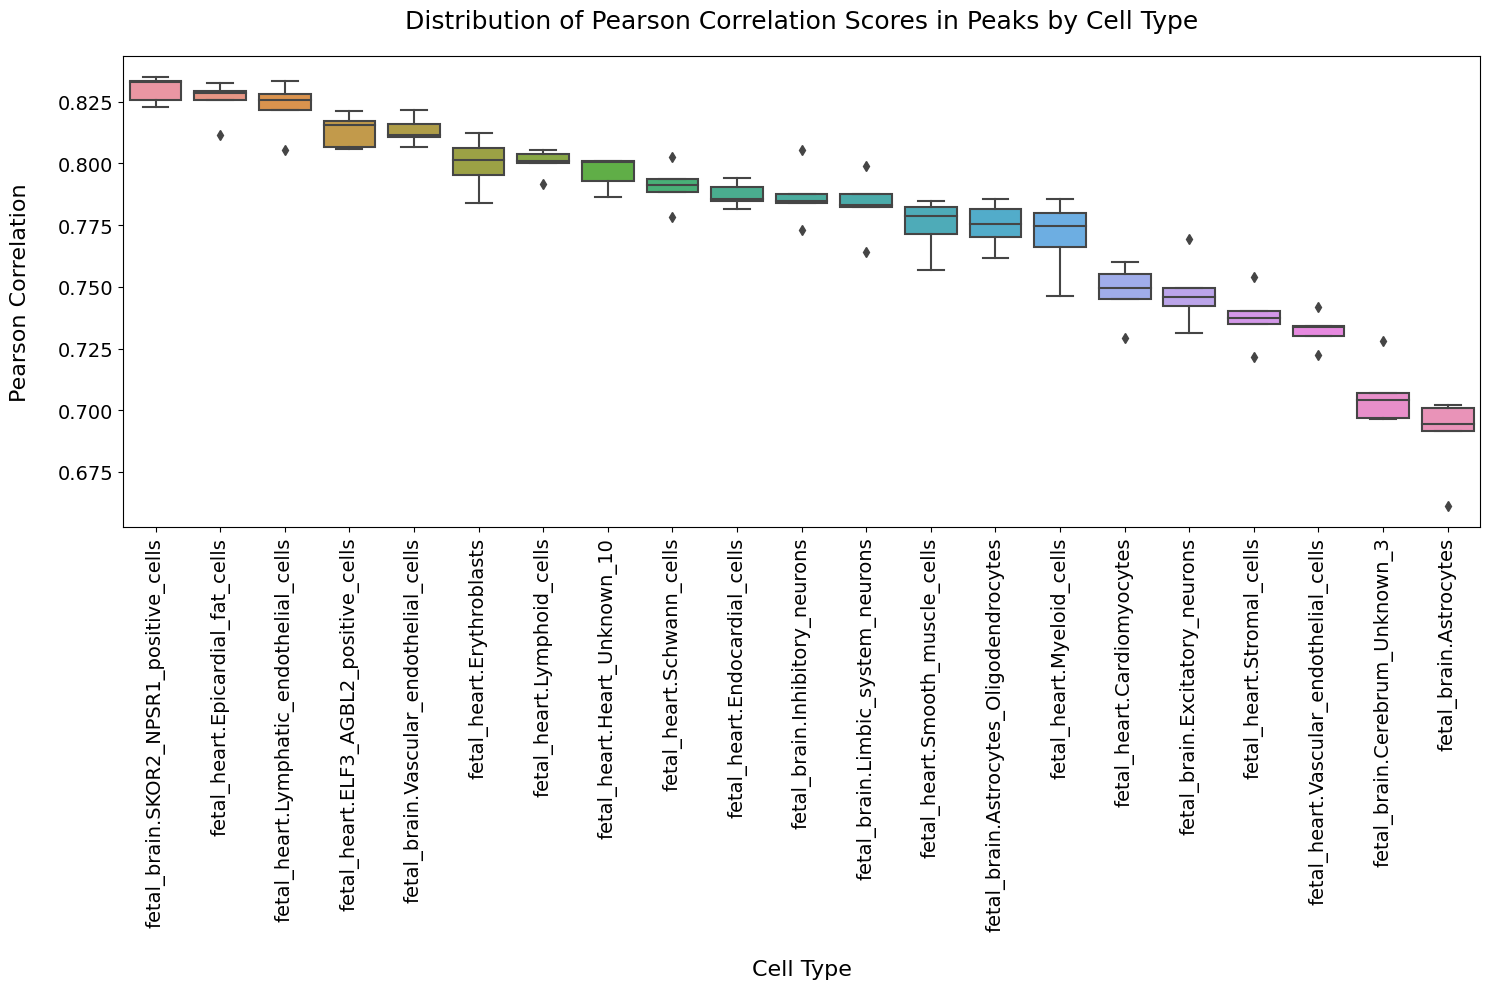

In [17]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='celltype', y='peaks_pearsonr', data=cell_type_metrics_df, order=sorted_peaks_pearson_scores_by_celltype)
plt.title('Distribution of Pearson Correlation Scores in Peaks by Cell Type', fontsize=18, pad=20)
plt.xlabel('Cell Type', fontsize=16, labelpad=20)
plt.ylabel('Pearson Correlation', fontsize=16, labelpad=20)
plt.xticks(rotation=90, fontsize=14)  # Rotate the cell type labels to make them readable
plt.yticks(fontsize=14)
# plt.ylim(0.60, 0.90)
plt.tight_layout()  # Adjust the layout

plt.show()

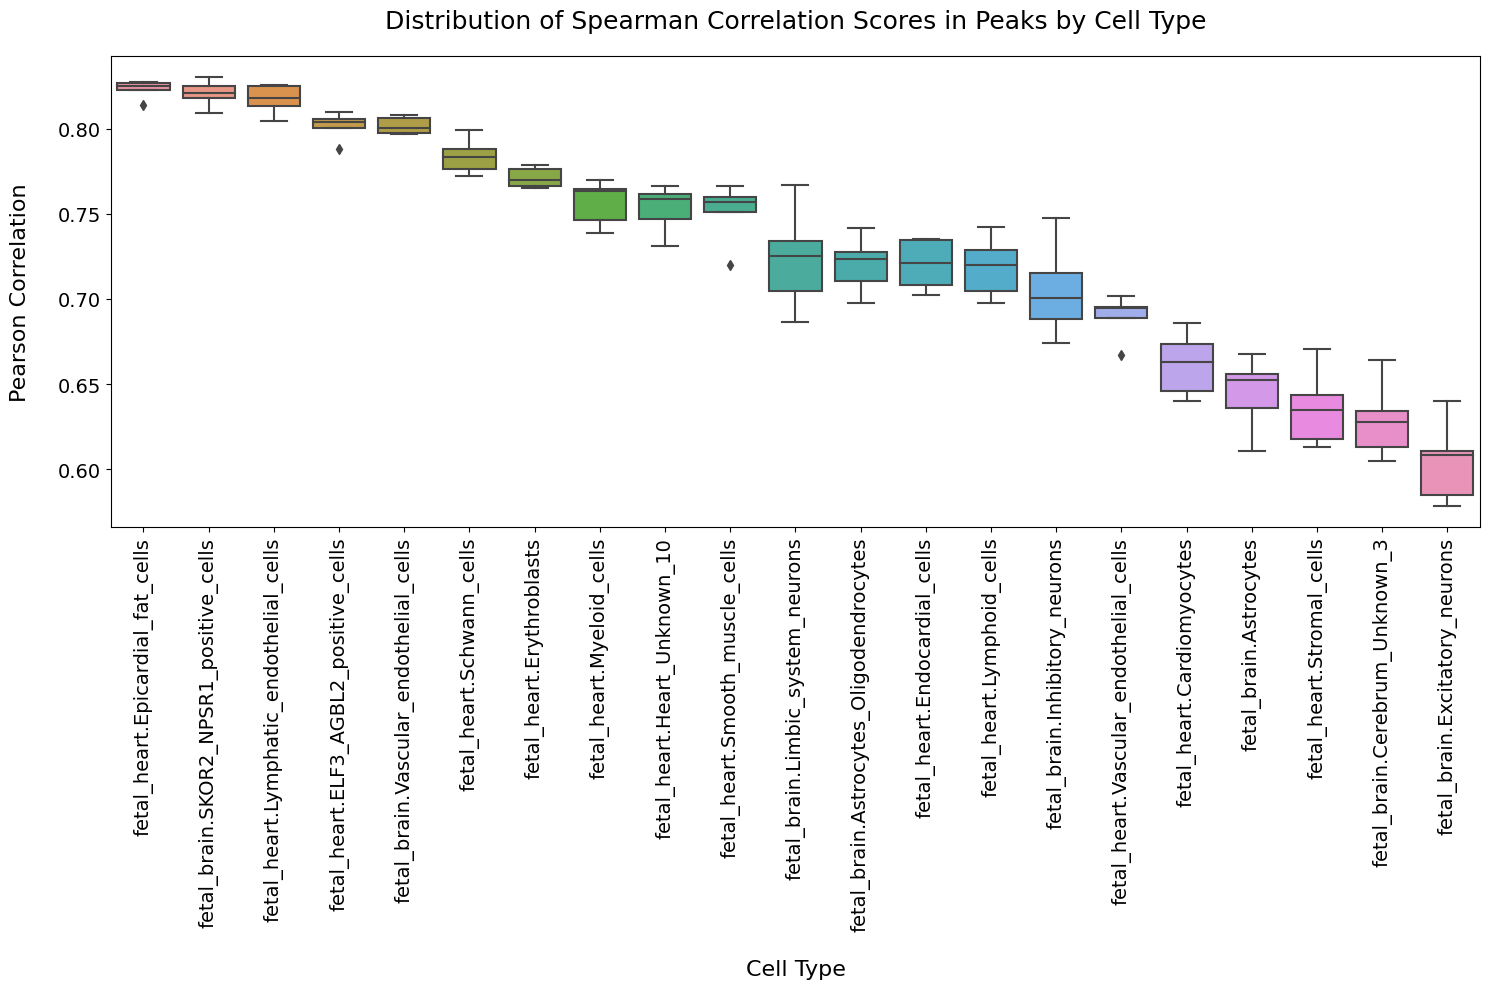

In [18]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='celltype', y='peaks_spearmanr', data=cell_type_metrics_df, order=sorted_peaks_spearman_scores_by_celltype)
plt.title('Distribution of Spearman Correlation Scores in Peaks by Cell Type', fontsize=18, pad=20)
plt.xlabel('Cell Type', fontsize=16, labelpad=20)
plt.ylabel('Pearson Correlation', fontsize=16, labelpad=20)
plt.xticks(rotation=90, fontsize=14)  # Rotate the cell type labels to make them readable
plt.yticks(fontsize=14)
# plt.ylim(0.60, 0.90)
plt.tight_layout()  # Adjust the layout

plt.show()

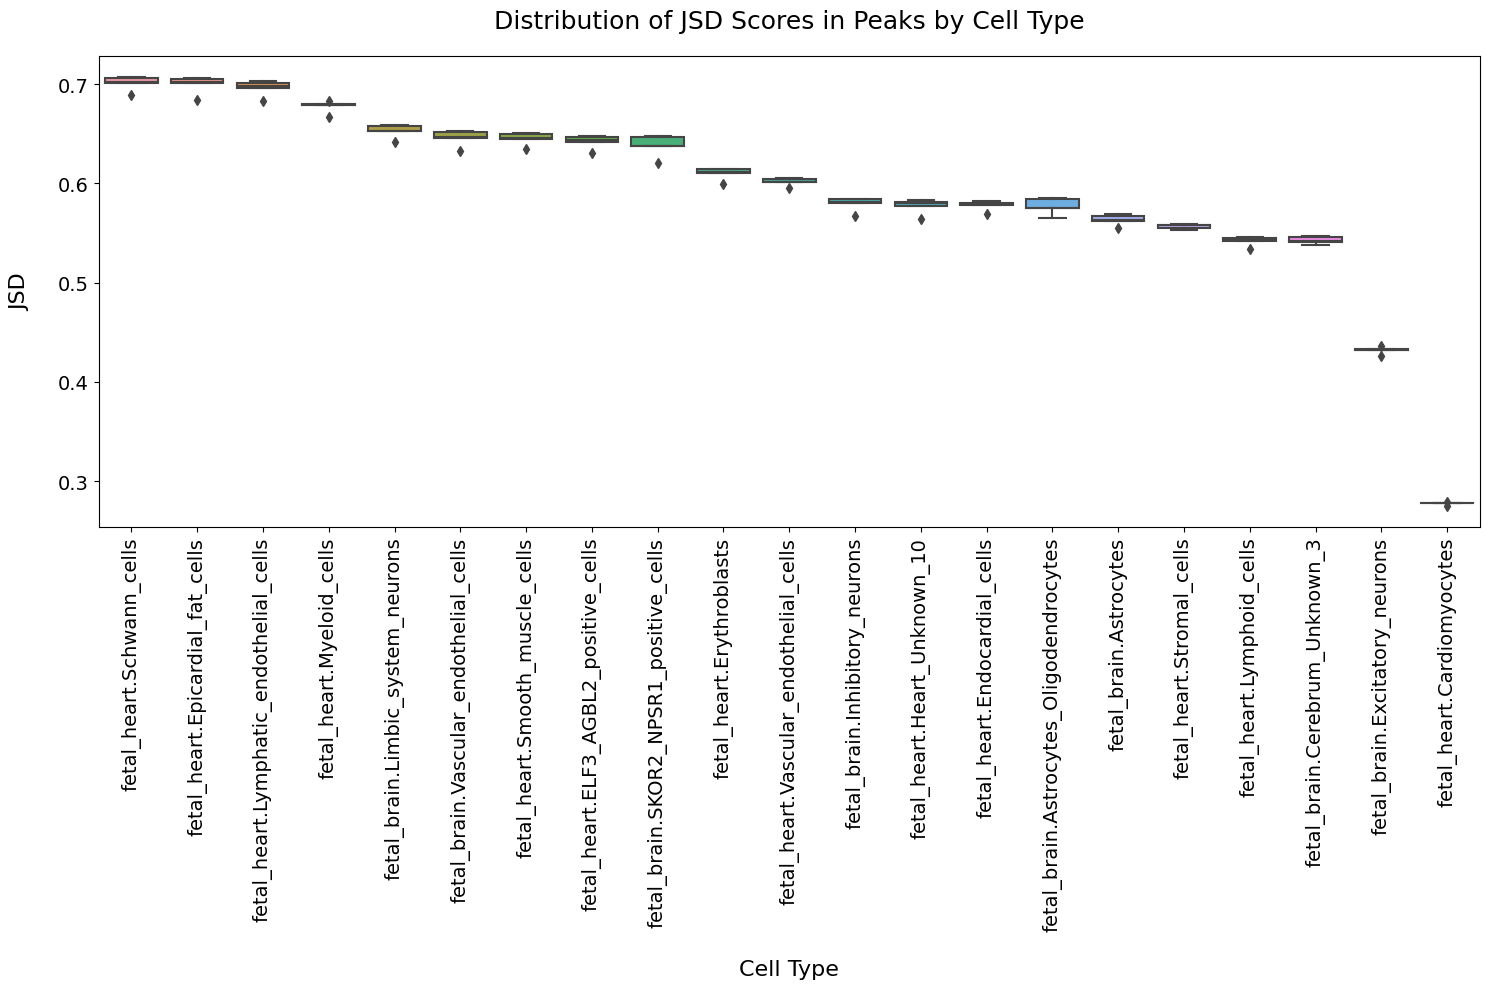

In [19]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='celltype', y='peaks_median_jsd', data=cell_type_metrics_df, order=sorted_peaks_jsd_scores_by_celltype)
plt.title('Distribution of JSD Scores in Peaks by Cell Type', fontsize=18, pad=20)
plt.xlabel('Cell Type', fontsize=16, labelpad=20)
plt.ylabel('JSD', fontsize=16, labelpad=20)
plt.xticks(rotation=90, fontsize=14)  # Rotate the cell type labels to make them readable
plt.yticks(fontsize=14)
plt.tight_layout()  # Adjust the layout

plt.show()

In [20]:
cell_type_metrics_df.to_csv(os.path.join(outs_dir, 'model_performance.tsv'),
                            index=False, sep='\t')